In [19]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.linear_model import Perceptron
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

### Load dataset

In [11]:
df = pd.read_csv('perceptron_data.csv')
print(df)
print(df.head())

     IQ  CGPA  Resume_Score  Placed
0    97  6.00          8.26       0
1   110  7.54          6.92       0
2    91  7.79          7.00       0
3    91  7.49          8.42       0
4    61  8.20          7.00       0
..  ...   ...           ...     ...
95  101  6.76          9.17       0
96   74  8.35          9.07       1
97   75  6.77          5.06       0
98  110  8.40          5.77       0
99   79  8.48          7.47       1

[100 rows x 4 columns]
    IQ  CGPA  Resume_Score  Placed
0   97  6.00          8.26       0
1  110  7.54          6.92       0
2   91  7.79          7.00       0
3   91  7.49          8.42       0
4   61  8.20          7.00       0


### Scatter plot to visualize the data in 3D

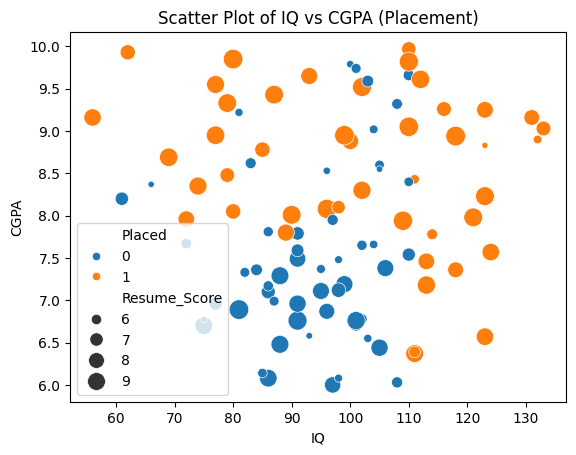

In [12]:
sns.scatterplot(x=df['IQ'], y=df['CGPA'], hue=df['Placed'], size=df['Resume_Score'], sizes=(20, 200))
plt.title("Scatter Plot of IQ vs CGPA (Placement)")
plt.show()

### Extract features and target variable

In [13]:
x = df[['IQ', 'CGPA', 'Resume_Score']]  # Features (IQ, CGPA, Resume Score)
y = df['Placed']  # Target variable (Placed or Not Placed)

### Standardizing the features

In [14]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

### Train Perceptron

In [15]:
p = Perceptron()
p.fit(x_scaled, y)

Perceptron()

### Print weights and bias

In [16]:
print("Weights:", p.coef_)
print("Bias (Intercept):", p.intercept_)

Weights: [[1.00121267 2.52051659 2.49358143]]
Bias (Intercept): [1.]


### Plotting the decision boundary

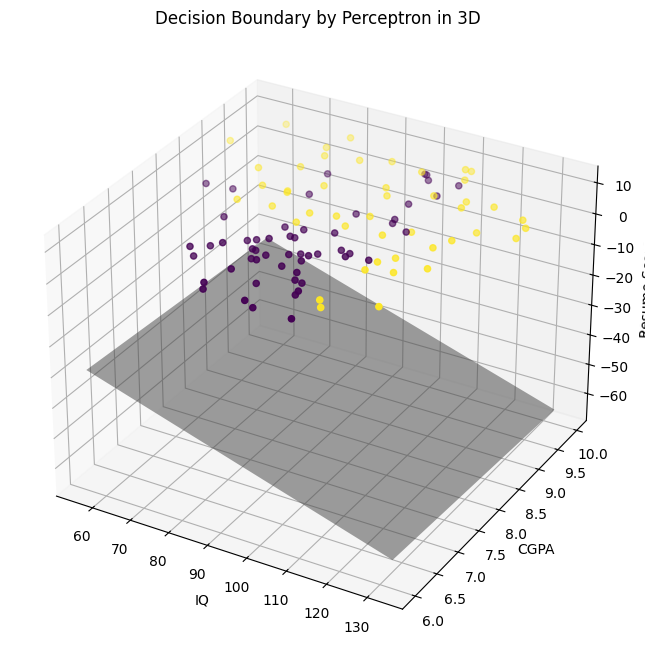

In [17]:
# Create the 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot data points in 3D
scatter = ax.scatter(df['IQ'], df['CGPA'], df['Resume_Score'], c=y, cmap='viridis', marker='o')

# Labels for the axes
ax.set_xlabel('IQ')
ax.set_ylabel('CGPA')
ax.set_zlabel('Resume Score')

# Create grid for plotting the decision boundary (plane)
xx, yy = np.meshgrid(np.linspace(df['IQ'].min(), df['IQ'].max(), 100),
                     np.linspace(df['CGPA'].min(), df['CGPA'].max(), 100))

# Calculate the decision boundary using the learned Perceptron model
# We need to compute Z (Resume Score) for the meshgrid
Z = (-p.intercept_ - p.coef_[0][0] * xx - p.coef_[0][1] * yy) / p.coef_[0][2]

# Plot the decision boundary (plane)
ax.plot_surface(xx, yy, Z, alpha=0.5, rstride=100, cstride=100, color='grey')

# Title for the plot
plt.title('Decision Boundary by Perceptron in 3D')

# Show the plot
plt.show()

### Calculate accuracy

In [18]:
accuracy = p.score(x_scaled, y)
print("Accuracy:", accuracy)

Accuracy: 0.81
